# Sotavento

El objetivo de esta práctica es practicar con diferentes métodos de aprendizaje automático: determinar el mejor método para un conjunto de datos, estimar el rendimiento futuro del mejor método  y construir el modelo final.

---

The objective of this practice is to practice with different machine learning methods: determine the best method for a dataset, estimate the future performance of the best method, and construct the final model.


## Authors

- Santiago Kiril Cenkov Stoyanov (100472051@alumnos.uc3m.es)
- Ignacio Fernández Cañedo (100471955@alumnos.uc3m.es)

---

## EDA (Exploratory Data Analysis)

### Data dimensions

En primer lugar, se realiza una lectura de los datos a estudiar, estos se encuentran en el fichero csv `wind.ava`. Filtramos el total de los datos por aquellos que nos interesan, los que finalizan en ".13". También vamos a examinar el número de características y de instancias que tiene el problema.

---

First, a reading of the data to be studied is carried out, these are found in a the csv file `wind.ava`. We filter the total data by those that interest us, those that end in ".13". We are also going to examine the number of features and instances that the problem has.

In [1]:
import pandas

data = pandas.read_csv('wind_ava.csv.gz', compression="gzip")
data = data.filter(regex='^.*(\.13|[^\.\d])$', axis=1)
print(f"- Features: {data.shape[1]}; {data.columns.tolist()}")
print(f"- Instances: {data.shape[0]}")

- Features: 24; ['datetime', 'energy', 'p54.162.13', 'p55.162.13', 'cape.13', 'p59.162.13', 'lai_lv.13', 'lai_hv.13', 'u10n.13', 'v10n.13', 'sp.13', 'stl1.13', 'u10.13', 'v10.13', 't2m.13', 'stl2.13', 'stl3.13', 'iews.13', 'inss.13', 'stl4.13', 'fsr.13', 'flsr.13', 'u100.13', 'v100.13']
- Instances: 4748


### Features type

Una vez seleccionados los datos, distinguimos las características numéricas de las categóricas.

---

Once the data is selected, we distinguish the numerical features from the categorical features.

In [2]:
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = data.select_dtypes(include=['object', 'category']).columns.tolist()
print(f"- Numerical features: {len(numerical_features)}; {numerical_features}")
print(f"- Categorical features: {len(categorical_features)}; {categorical_features}")

- Numerical features: 23; ['energy', 'p54.162.13', 'p55.162.13', 'cape.13', 'p59.162.13', 'lai_lv.13', 'lai_hv.13', 'u10n.13', 'v10n.13', 'sp.13', 'stl1.13', 'u10.13', 'v10.13', 't2m.13', 'stl2.13', 'stl3.13', 'iews.13', 'inss.13', 'stl4.13', 'fsr.13', 'flsr.13', 'u100.13', 'v100.13']
- Categorical features: 1; ['datetime']


### Duplicated features

Comprobamos si hay datos duplicados.

---

We verify if the problem contains duplicated values.

In [3]:
if data[data.duplicated()].any(axis=None):
    print("- Duplicated features: YES")
else:
    print("- Duplicated features: NO")

- Duplicated features: NO


### Variance verification

Aunque no haya características constantes, debemos verificar si hay datos muy parecidos entre sí.


---

Even if there are no constant features, we must verify if there are data that are very similar to each other.

In [4]:
#Utilizar unicamente los datos  numericos
numerical = data.select_dtypes(include=['int64', 'float64'])
# Verificar la varianza de cada característica
print(numerical.var())

energy        4.429323e+05
p54.162.13    2.009369e+09
p55.162.13    4.293153e+01
cape.13       1.482525e+04
p59.162.13    2.151950e+12
lai_lv.13     1.579087e-01
lai_hv.13     1.355691e-02
u10n.13       9.613612e+00
v10n.13       9.100875e+00
sp.13         5.093529e+05
stl1.13       4.114356e+01
u10.13        9.973619e+00
v10.13        9.355127e+00
t2m.13        3.798852e+01
stl2.13       3.077972e+01
stl3.13       2.100230e+01
iews.13       1.346989e-01
inss.13       1.436517e-01
stl4.13       1.262291e+01
fsr.13        5.779241e-05
flsr.13       8.903704e-03
u100.13       2.344235e+01
v100.13       2.178604e+01
dtype: float64


Como se puede observar, no hay datos iguales pero algunos son muy parecidos entre sí.

---

As you can see, there are no identical data but some are very similar to each other.

### Missing values

In [5]:
if data.isna().any(axis=None):
    print("- Missing values: YES")
else:
    print("- Missing values: NO")

- Missing values: NO


### Problem type

*Target feature is numerical <=> Regression problem*

*Target feature is categorical <=> Classification problem*

In [6]:
if 'energy' in numerical_features:
    print("- Problem type: REGRESSION")
else:
    print("- Problem type: CLASSIFICATION")

- Problem type: REGRESSION


### Histogram

Creamos un histograma para poder visualizar y entender la distribución de la variable objetivo: energy.

---

We create a histogram to be able to visualize and understand the distribution of the objective variable: energy.

/home/santiago/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


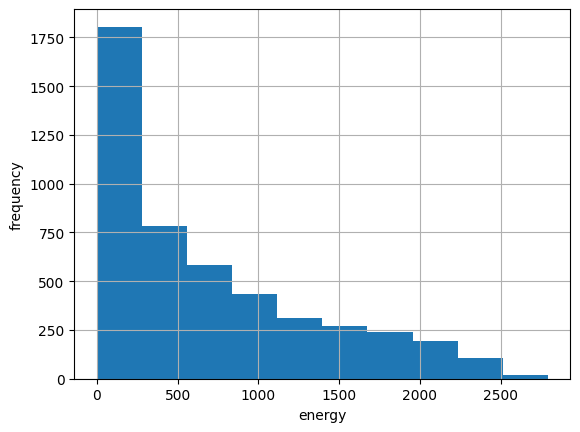

In [7]:
import matplotlib.pyplot as plt

data['energy'].hist()
plt.xlabel('energy')
plt.ylabel('frequency')
plt.show()

Se puede observar que hay relativamente menos valores de energía alta que de baja. Esto no será un problema porque la tarea es de regresión luego no existe el concepto de clase menos representada.

---

It can be observed that there are relatively fewer high-energy values than low-energy values. This won't be a problem because the task is regression, so there's no concept of a less represented class.

### Correlation matrix

Ahora observamos los datos creando una matriz de correlación, en esta matriz cada celda en la tabla muestra la relación entre dos variables. Hay que indicar que únicamente nos vamos a fijar en la fila / columna de la variable objetivo, la de energía.

---

Now we look at the data by creating a correlation matrix, in this matrix each cell in the table shows the relationship between two variables. It should be noted that we are only going to look at the row/column of the target variable, energy.

<Axes: >

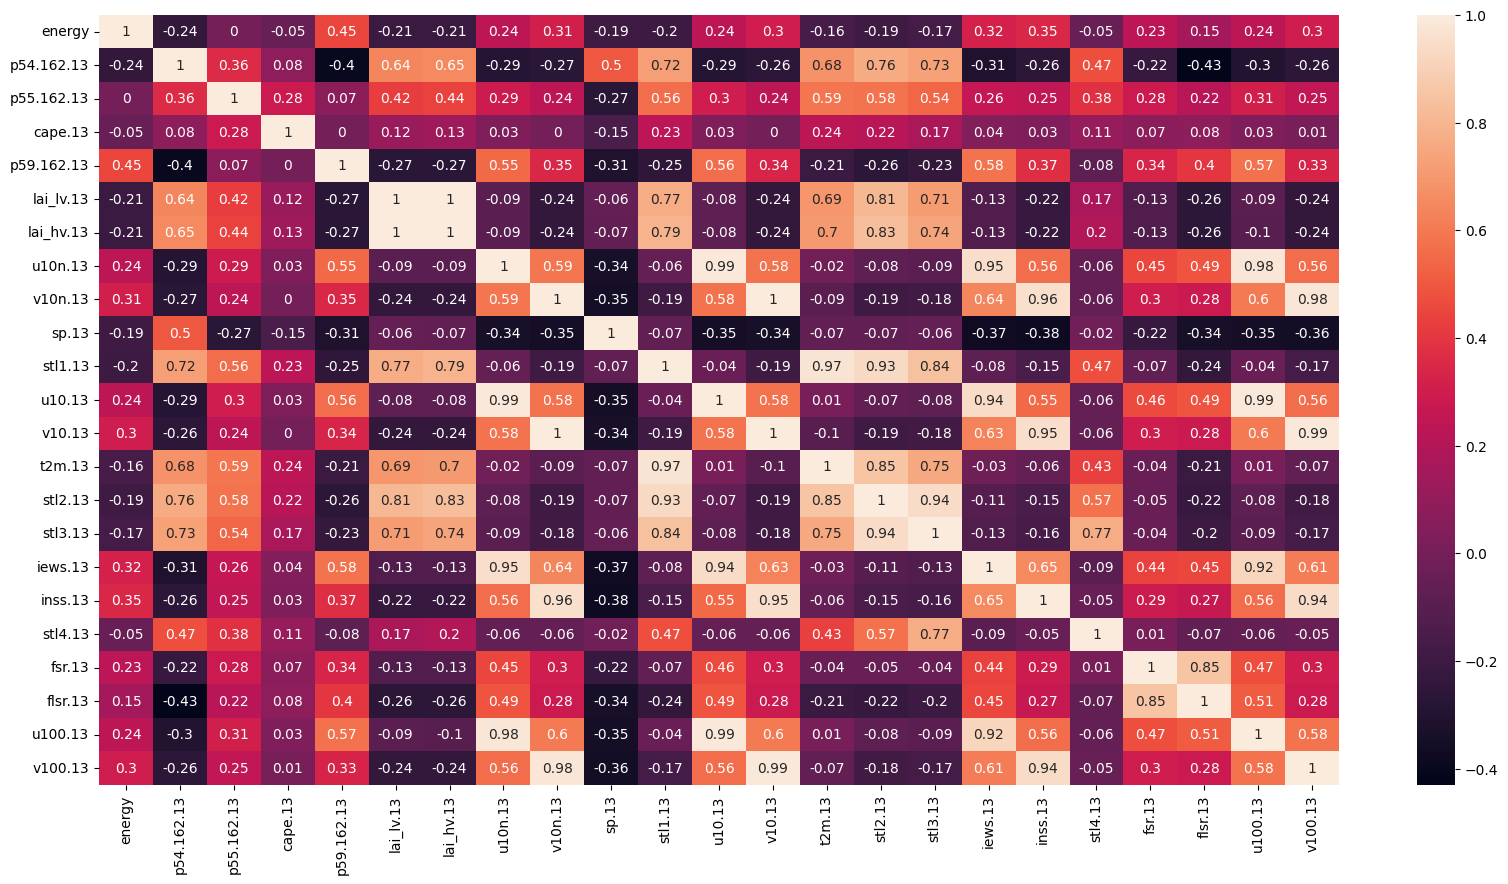

In [8]:
import seaborn

correlation_matrix = data.select_dtypes(include=['int64', 'float64']).corr().round(2)
plt.figure(figsize=(20, 10))
seaborn.heatmap(data=correlation_matrix, annot=True)

Como podemos observar en la fila/columna de la variable objetivo, hay valores cercanos a 1, como el caso de la variable p59.162.13.

---

As we can see in the row/column of the target variable, there are values ​​close to 1, as in the case of the variable p59.162.13.

## Evaluation

### Outer evaluation

La evaluación *outer* tiene como objetivo la evaluación de un modelo una vez construido y sirve para estimar su eficacia. Una técnica común es utilizar *train-test split holdout*. Esta divide aleatorialmente el conjunto de datos en dos partes: una para entreanmiento (70-80% comunmente) y otra para evaluación (20-30% comunmente).

Por otro lado, es importante considerar el tamaño de los subconjuntos para entrenamiento y evaluación:
- Tamaños de entrenamiento grandes frente al de evaluación resultan en una peor estimación del error del modelo más incierta.
- Tamaños de evaluación grandes frente al de entrenamiento resultan en modelos peores.

Una solución sería probar distintas particiones del conjunto de datos. Sin embargo, se opta por utilizar una partición fija comunmente usada por simplicidad, eficiencia temporal y tendencia a obtener buenos resultados.

Por tanto se utilizará ***train-test split holdout*** y una división fija de **80% para entrenamiento y 20% para evaluación**.

---

The outer evaluation aims to assess a model once it is constructed and serves to estimate its effectiveness. A common technique is to use the train-test split holdout. This involves randomly dividing the dataset into two subsets: the training set (commonly 70-80%) and the evaluation set (commonly 20-30%).

Additionally, it's crucial to consider the sizes of the training and evaluation subsets:
- Larger training sizes compared to evaluation result in a poorer and more uncertain model error estimation.
- Larger evaluation sizes compared to training result in worse models.

One solution would be to try different data partitions. However, the decision is made to use a commonly used fixed partition for simplicity, time efficiency, and a tendency to achieve good results.

Therefore, **train-test split holdout** will be used and a fixed split of **80% for training and 20% for evaluation**.

In [9]:
from sklearn.model_selection import train_test_split

TEST_SIZE = 0.2  # test subset %

### Inner evaluation

La evaluación *inner* tiene como objetivo la evaluación de un modelo mientras se está construyendo y sirve para el ajuste de hiper-parámetros. Una técnica común es utilizar *cross-validation*. Esta divide el conjunto de entrenamiento en instancias de entrenamiento e instancias de *test*. De entre todos los tipos de *cross-validation*, una opción es *K-fold cross-validation* el cual hace la división en *K-folds* e itera K veces para que todas las instancias del conjunto de datos hayan sido de entrenamiento y en una iteración de *test*. Se opta por este debido a su simplicidad y sobretodo por su eficiencia temporal frente a otros *cross-validation*.

Por otro lado para la búsqueda de hiperparámetros se utilizará Random Search con número de combinaciones por defecto (10). Este método es computacionalmente menos costoso que Grid Search, el cual prueba todas las combinaciones posibles, y se ha demostrado que funciona bien pues algunos hiperparámetros son más importantes que otros para ajustar.

Por tanto se utilizará ***K-fold cross-validation*** con **K = 5** mediante **Random Search**.

---

Inner evaluation aims to assess a model while it's being constructed and serves for hyperparameter tuning. A common technique for inner evaluation is cross-validation. This method divides the training dataset into training instances and test instances. Among all types of cross-validation, one option is K-fold cross-validation, which divides the data into K folds and iterates K times to ensure that all instances have been part of both the training and test sets. This approach is chosen for its simplicity and efficiency compared to other cross-validation methods.

For hyperparameter tuning, Random Search will be used with the default number of combinations (10). This method is computationally less expensive than Grid Search, which tests all possible combinations, and has been shown to work well as some hyperparameters are more important than others for tuning.

Therefore, ***K-fold cross-validation*** with **K = 5** will be utilized via **Random Search**.

In [10]:
from sklearn.model_selection import KFold

K_FOLDS = 5  # number of fold for cross-validation

### Metrics

En primer lugar puesto que se trata de un problema de regresión, se utilizarán métricas para modelos de regresión. Se van a usar 2 métricas:
- **RMSE (Root Mean Squared Error)**: es más fácil de interpretar puesto que la magnitud del error es la misma que la de la variable objetivo.
- **R2 (Coefficient of determination)**: puesto que su dominio es [0,1], se puede comparar más facilmente entre modelos. Además será muy útil para determinar el modelo final puesto que R2 mide la proporción de la variable dependiente que es explicada a partir de las variables independientes.

---

Firstly, since the problem is a regression task, regression model metrics will be utilized. Two metrics will be employed:
- **RMSE (Root Mean Squared Error)**: this metric is straightforward to interpret as the error magnitude aligns with that of the target variable.
- **R2 (Coefficient of determination)**: with its range being [0,1], R2 facilitates easier comparison between models. Moreover, it will be instrumental in determining the final model, as it quantifies the proportion of the dependent variable explained by the independent variables.

In [11]:
from sklearn import metrics

## Models

In [12]:
import time
import numpy
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

X = data.select_dtypes(include=['int64', 'float64']).drop('energy', axis=1)  # idependent features
Y = data['energy']  # dependent feature
SEED = 55  # reproducibility seed
IMPORTANT_FEATURES = 5  # number of most important features
BUDGET=25  # number of hyperparameters combinations

models = {
    'Non-Adjusted': dict(),
    'Adjusted': dict()
}  # models created

### Dummy Regressor

El *dummy model*, también conocido como *baseline model* o *naive model*, es el modelo más simple que se puede construir. En regresión un *dummy regressor* utiliza reglas simples como la media o la mediana para predecir la variable objetivo.

Este modelo se utiliza para comparar la eficacia de otros modelos más complejos. De forma que si un modelo más complejo no consigue superar el *dummy model*, no es eficaz.

---

The dummy model, also known as the baseline model or naive model, is the simplest model that can be constructed. In regression, a dummy regressor uses simple rules such as the mean or median to predict the target variable.

This model is used to compare the effectiveness of other, more complex models. So if a more complex model fails to surpass the dummy model, it is not effective.

In [13]:
from sklearn.dummy import DummyRegressor

print("Dummy Regressor:")
training_time = time.time()  # start training time

# MODEL SETUP
model = DummyRegressor()  # model

# MODEL TRAINING
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=TEST_SIZE, random_state=SEED)
# - training subset: x_train U y_train
# - test subset: x_test U y_test
numpy.random.seed(SEED) # reproducibility
model.fit(x_train, y_train)

# MODEL EVALUATION
y_test_pred = model.predict(x_test)  # dependent feature model predictions
rmse = numpy.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
r2 = numpy.clip(metrics.r2_score(y_test, y_test_pred), 0, 1)

training_time = time.time() - training_time  # end training time

models['Non-Adjusted']['Dummy Regressor'] = {
    'Mean': {
        'Model': model,
        'Training time': training_time,
        'RMSE': rmse,
        'R2': r2
    }
}

print(f"- Training time: {training_time:.3f} s")
print("- Errors:")
print(f"   -  RMSE: {rmse:.3f}")
print(f"   -  R2: {r2:.3f}")
print("- Hyperparameters:")
for param, value in model.get_params().items():
    print(f"   -  {param}: {value}")
print(f"- Top {IMPORTANT_FEATURES} features: NO")

Dummy Regressor:
- Training time: 0.006 s
- Errors:
   -  RMSE: 654.043
   -  R2: 0.000
- Hyperparameters:
   -  constant: None
   -  quantile: None
   -  strategy: mean
- Top 5 features: NO


Un R2 = 0 indica que el *dummy model* nunca predice correctamente. Luego cualquier otro modelo debe superar al *dummy model* con un R2 significativamente > 0.

---

An R2 = 0 indicates that the dummy model never predicts correctly. Therefore, any other model must outperform the dummy model with an R2 significantly > 0.

### Decision Tree

Los árboles de decisión son uno de los primero algoritmos de aprendizaje automático que existen. Se han demostrado útiles tanto en problemas de clasificación como de regresión si se selecciona el árbol de decisión adecuado y se realiza un buen ajuste de hiperparámetros.

Fortalezas:
- Selecciona atributos de forma implícita.
- Determina la importancia de los atributos. Atributos más cercanos a la raíz son más importantes.
- Se puede representar visualmente haciendolo fácil e intuitivo de interpretar y explicar.

Debilidades:
- Los árboles de decisión tienden a sobreaprender si no se limita la produndidad.
- Las fronteras de decisión de los árboles de decisión son no lineales carentes de suavidad.

---

Decision trees are one of the earliest machine learning algorithms to exist. They have proven useful in both classification and regression problems if the right decision tree is selected and proper hyperparameter tuning is performed.

Strengths:
- Implicitly selects attributes.
- Determines the importance of features. Features closer to the root are more important.
- Can be visually represented, making it easy and intuitive to interpret and explain.

Weaknesses:
- Decision trees tend to overfit if the depth is not limited.
- Decision boundaries of decision trees are nonlinear and lack smoothness.

#### CART

El primer modelo de aprendizaje automático que se desea probar es un árbol de decisión CART (Classification and Regression Trees). Este algoritmo emplea árboles de decisión y nace a partir de algoritmos más simples como ID3 o C4.5. CART a diferencia de sus predecesores, es capaz de tratar problemas tanto de clasificación como de regresión.

Fortalezas:
- Es no paramétrico y por tanto no realiza suposiciones sobre los datos, permitiendole encontrar patrones complejos.
- Puede manejar atributos numéricos y/o categóricos a la vez.
- Es robusto a valores atípicos.

Debilidades:
- Alta varianza entre diferentes conjuntos de entrenamiento.

---

The first machine learning model to be tested is a CART (Classification and Regression Trees) decision tree. This algorithm employs decision trees and stems from simpler algorithms like ID3 or C4.5. Unlike its predecessors, CART is capable of handling both classification and regression problems.

Strengths:
- Is non-parametric, hence it makes no assumptions about the data, allowing it to find complex patterns.
- Can handle both numerical and/or categorical attributes simultaneously.
- Robust to outliers.

Weaknesses:
- High variance among different training sets.

##### Default hyperparameters

In [14]:
from sklearn.tree import DecisionTreeRegressor

print("CART:")
training_time = time.time()  # start training time

# MODEL SETUP
model = DecisionTreeRegressor()  # model

# MODEL TRAINING
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=TEST_SIZE, random_state=SEED)
# - training subset: x_train U y_train
# - test subset: x_test U y_test
numpy.random.seed(SEED) # reproducibility
model.fit(x_train, y_train)

# MODEL EVALUATION
y_test_pred = model.predict(x_test)  # dependent feature model predictions
rmse = numpy.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
r2 = numpy.clip(metrics.r2_score(y_test, y_test_pred), 0, 1)

training_time = time.time() - training_time  # end training time

models['Non-Adjusted']['Decision Tree'] = {
    'CART': {
        'Model': model,
        'Training time': training_time,
        'RMSE': rmse,
        'R2': r2
    }
}

print(f"- Training time: {training_time:.3f} s")
print("- Errors:")
print(f"   -  RMSE: {rmse:.3f}")
print(f"   -  R2: {r2:.3f}")
print("- Hyperparameters:")
for param, value in model.get_params().items():
    print(f"   -  {param}: {value}")
print(f"- Top {IMPORTANT_FEATURES} features:")
for importance, feature in sorted(zip(model.feature_importances_, X.columns), reverse=True)[:IMPORTANT_FEATURES]:
    print(f"   -  '{feature}': {importance*100:.3f} %")

CART:
- Training time: 0.107 s
- Errors:
   -  RMSE: 475.075
   -  R2: 0.472
- Hyperparameters:
   -  ccp_alpha: 0.0
   -  criterion: squared_error
   -  max_depth: None
   -  max_features: None
   -  max_leaf_nodes: None
   -  min_impurity_decrease: 0.0
   -  min_samples_leaf: 1
   -  min_samples_split: 2
   -  min_weight_fraction_leaf: 0.0
   -  monotonic_cst: None
   -  random_state: None
   -  splitter: best
- Top 5 features:
   -  'iews.13': 33.355 %
   -  'u100.13': 24.340 %
   -  'inss.13': 9.667 %
   -  'stl1.13': 3.566 %
   -  't2m.13': 3.215 %


##### Custom hyperparameters

El principal hiperparámetro que se va a ajustar es:
- `max_depth`: máxima profundidad del árbol. Se debe limitar.

Otros hiperparámetros interesantes con los que experimentar son:
- `min_samples_split`: número mínimo de instancias en un nodo interno para poder dividirlo.
- `min_samples_leaf`: número mínimo de instancias en un nodo hoja para poder dividirlo.
- `max_leaf_nodes`: número máximo de nodos hoja en el árbol.

---

The main hyperparameter to adjust is:
- `max_depth`: the maximum depth of the tree. It needs to be limited.

Other interesting hyperparameters to experiment with are:
- `min_samples_split`: minimum number of samples required to split an internal node.
- `min_samples_leaf`: minimum number of samples required to be at a leaf node.
- `max_leaf_nodes`: maximum number of leaf nodes in the tree.

In [15]:
print("CART:")
training_time = time.time()  # start training time

# MODEL SETUP
params = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [2, 5, 10, 15],
    'max_leaf_nodes': [None, 5, 10, 15]
}  # params
model = RandomizedSearchCV(
    estimator=DecisionTreeRegressor(),  # model type
    scoring='neg_root_mean_squared_error',  # inner evaluation metrics
    param_distributions=params,  # hyperparameters ranges
    cv=KFold(n_splits=K_FOLDS, shuffle=True, random_state=SEED),  # cross-validation inner evaluation
    n_jobs=-1,  # parallel execution
    verbose=False,  # execution messages
    random_state=SEED,  # reproducibility
    n_iter=BUDGET  # number of hyperparameters combinations
)  # model

# MODEL TRAINING
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=TEST_SIZE, random_state=SEED)
# - training subset: x_train U y_train
# - test subset: x_test U y_test
numpy.random.seed(SEED) # reproducibility
model.fit(x_train, y_train)

best_params = model.best_params_ # params
model = model.best_estimator_  # model

# MODEL EVALUATION
y_test_pred = model.predict(x_test)  # dependent feature model predictions
rmse = numpy.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
r2 = numpy.clip(metrics.r2_score(y_test, y_test_pred), 0, 1)

training_time = time.time() - training_time  # end training time

models['Adjusted']['Decision Tree'] = {
    'CART': {
        'Model': model,
        'Params': best_params,
        'Training time': training_time,
        'RMSE': rmse,
        'R2': r2
    }
}

print(f"- Training time: {training_time:.3f} s")
print("- Errors:")
print(f"   -  RMSE: {rmse:.3f}")
print(f"   -  R2: {r2:.3f}")
print("- Hyperparameters:")
for param, value in model.get_params().items():
    if param in best_params:
        print(f"  (*) {param}: {value}")
    else:
        print(f"   -  {param}: {value}")
print(f"- Top {IMPORTANT_FEATURES} features:")
for importance, feature in sorted(zip(model.feature_importances_, X.columns), reverse=True)[:IMPORTANT_FEATURES]:
    print(f"   -  '{feature}': {importance*100:.3f} %")

CART:


- Training time: 2.098 s
- Errors:
   -  RMSE: 412.886
   -  R2: 0.601
- Hyperparameters:
   -  ccp_alpha: 0.0
   -  criterion: squared_error
  (*) max_depth: 5
   -  max_features: None
  (*) max_leaf_nodes: None
   -  min_impurity_decrease: 0.0
  (*) min_samples_leaf: 5
  (*) min_samples_split: 2
   -  min_weight_fraction_leaf: 0.0
   -  monotonic_cst: None
   -  random_state: None
   -  splitter: best
- Top 5 features:
   -  'iews.13': 46.154 %
   -  'u100.13': 31.842 %
   -  'inss.13': 11.375 %
   -  'stl1.13': 4.070 %
   -  'v100.13': 1.773 %


##### Results

- **Ambos árboles de decisión superan indudablemente al *dummy model*** con un R2 significativamente mayor a 0.
- **CART con los hiperparámetros ajustados supera al no ajustado** con ~0.13 más en R2 y ~60 menos en RMSE.
- Ambos árboles de decisión **coinciden en cuáles son los 3 primeros atributos más importantes** (`iews.13`, `u100.13` y `inss.13` en este orden).

**El mejor modelo entre los dos es CART con los hiperparámetros ajustados**.

---

- The training time of CART with adjusted hyperparameters is in the order of units (~3 s), while the unadjusted one is below 1 second (~0.5 s). **The unadjusted one is ~6 times faster to train**.
- **Both decision trees undoubtedly outperform the dummy model** with an R2 significantly greater than 0.
- **CART with adjusted hyperparameters surpasses the unadjusted one** by ~0.13 more in R2 and ~60 less in RMSE.
- Both decision trees **agree on the top 3 most important attributes** (`iews.13`, `u100.13`, and `inss.13`, in this order).

**The best model among the two is CART with adjusted hyperparameters**.

#### Random Forest

Random Forest es un método *ensemble* que construye varios árboles de decisiones, generalmente CART, y entrena cada uno con un subconjunto de datos distinto. Una vez construidos, se predice la variable objetivo como la media o la mediana de la predicción de todos los demás árboles. Se puede utilziar tanto para problemas de clasificación como de regresión. 

Fortalezas:
- Cada árbol de decisión contruido captura una parte del conocimeinto. El cuál se puede ensamblar entre todos.
- Es menos sensible a sobreaaprender comparado a árboles de decisión individuales.
- Es no paramétrico y por tanto no realiza suposiciones sobre los datos, permitiendole encontrar patrones complejos.
- Es robusto a valores atípicos.

Debilidades:
- Es más difícil de interpretar que un árbol de decisión individual.
- Mayor consumo de memoria puesto que debe almacenar cada árbol construido.
- Puede ser computacionalmente costoso si no se limita la produndidad de los árboles construidos.

---

Random Forest is an ensemble method that constructs multiple decision trees, typically CART, and trains each one with a different subset of data. Once constructed, the target variable is predicted as the mean or median of the predictions from all other trees. It can be used for both classification and regression problems.

Strengths:
- Each decision tree captures a portion of knowledge, which can be assembled across all trees.
- Less sensitive to overfitting compared to individual decision trees.
- Is non-parametric and therefore makes no assumptions about the data, allowing it to find complex patterns.
- Robust to outliers.

Weaknesses:
- Is more difficult to interpret than an individual decision tree.
- Has higher memory consumption since it needs to store each constructed tree.
- Can be computationally costly if the depth of the constructed trees is not limited.

##### Default hyperparameters

In [16]:
from sklearn.ensemble import RandomForestRegressor

print("Random Forest:")
training_time = time.time()  # start training time

# MODEL SETUP
model = RandomForestRegressor(n_jobs=-1, random_state=SEED)  # model

# MODEL TRAINING
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=TEST_SIZE, random_state=SEED)
# - training subset: x_train U y_train
# - test subset: x_test U y_test
numpy.random.seed(SEED) # reproducibility
model.fit(x_train, y_train)

# MODEL EVALUATION
y_test_pred = model.predict(x_test)  # dependent feature model predictions
rmse = numpy.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
r2 = numpy.clip(metrics.r2_score(y_test, y_test_pred), 0, 1)

training_time = time.time() - training_time  # end training time

models['Non-Adjusted']['Decision Tree']['Random Forest'] = {
    'Model': model,
    'Training time': training_time,
    'RMSE': rmse,
    'R2': r2
}

print(f"- Training time: {training_time:.3f} s")
print("- Errors:")
print(f"   -  RMSE: {rmse:.3f}")
print(f"   -  R2: {r2:.3f}")
print("- Hyperparameters:")
for param, value in model.get_params().items():
    print(f"   -  {param}: {value}")
print(f"- Top {IMPORTANT_FEATURES} features:")
for importance, feature in sorted(zip(model.feature_importances_, X.columns), reverse=True)[:IMPORTANT_FEATURES]:
    print(f"   -  '{feature}': {importance*100:.3f} %")

Random Forest:
- Training time: 1.465 s
- Errors:
   -  RMSE: 342.519
   -  R2: 0.726
- Hyperparameters:
   -  bootstrap: True
   -  ccp_alpha: 0.0
   -  criterion: squared_error
   -  max_depth: None
   -  max_features: 1.0
   -  max_leaf_nodes: None
   -  max_samples: None
   -  min_impurity_decrease: 0.0
   -  min_samples_leaf: 1
   -  min_samples_split: 2
   -  min_weight_fraction_leaf: 0.0
   -  monotonic_cst: None
   -  n_estimators: 100
   -  n_jobs: -1
   -  oob_score: False
   -  random_state: 55
   -  verbose: 0
   -  warm_start: False
- Top 5 features:
   -  'iews.13': 34.042 %
   -  'u100.13': 24.119 %
   -  'inss.13': 8.649 %
   -  'p59.162.13': 3.669 %
   -  't2m.13': 3.535 %


##### Custom hyperparameters

Los principales hiperparámetros son:
- `max_depth`: máxima profundidad de cada árbol individual.
- `n_estimators`: número de árboles generados.

Otros hiperparámetros interesantes con los que experimentar son:
- `max_features`: número de atributos que considerar para hacer la división de un nodo en cada árbol individual. 
- `min_samples_split`: número mínimo de instancias en un nodo interno para poder dividirlo.
- `min_samples_leaf`: número mínimo de instancias en un nodo hoja para poder dividirlo.

---

The main hyperparameters are:
- `max_depth`: the maximum depth of each individual tree.
- `n_estimators`: the number of trees generated.

Other interesting hyperparameters to experiment with are:
- `max_features`: the number of attributes to consider when making the split at each individual tree node.
- `min_samples_split`: the minimum number of instances in an internal node to be able to split it.
- `min_samples_leaf`: the minimum number of instances in a leaf node to be able to split it.

In [17]:
print("Random Forest:")
training_time = time.time()  # start training time

# MODEL SETUP
params = {
    'max_depth': [5, 10, 15, 20, 30, 50],
    'n_estimators': [50, 100, 200, 300, 400, 500],
    'max_features': [1, 3, 6, 9, 12, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5, 10]
}  # params
model = RandomizedSearchCV(
    estimator=RandomForestRegressor(n_jobs=-1, random_state=SEED),  # model type
    scoring='neg_root_mean_squared_error',  # inner evaluation metrics
    param_distributions=params,  # hyperparameters ranges
    cv=KFold(n_splits=K_FOLDS, shuffle=True, random_state=SEED),  # cross-validation inner evaluation
    n_jobs=-1,  # parallel execution
    verbose=False,  # execution messages
    random_state=SEED,  # reproducibility
    n_iter=BUDGET  # number of hyperparameters combinations
)  # model

# MODEL TRAINING
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=TEST_SIZE, random_state=SEED)
# - training subset: x_train U y_train
# - test subset: x_test U y_test
numpy.random.seed(SEED) # reproducibility
model.fit(x_train, y_train)

best_params = model.best_params_ # params
model = model.best_estimator_  # model

# MODEL EVALUATION
y_test_pred = model.predict(x_test)  # dependent feature model predictions
rmse = numpy.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
r2 = numpy.clip(metrics.r2_score(y_test, y_test_pred), 0, 1)

training_time = time.time() - training_time  # end training time

models['Adjusted']['Decision Tree']['Random Forest'] = {
    'Model': model,
    'Params': best_params,
    'Training time': training_time,
    'RMSE': rmse,
    'R2': r2
}

print(f"- Training time: {training_time:.3f} s")
print("- Errors:")
print(f"   -  RMSE: {rmse:.3f}")
print(f"   -  R2: {r2:.3f}")
print("- Hyperparameters:")
for param, value in model.get_params().items():
    if param in best_params:
        print(f"  (*) {param}: {value}")
    else:
        print(f"   -  {param}: {value}")
print(f"- Top {IMPORTANT_FEATURES} features:")
for importance, feature in sorted(zip(model.feature_importances_, X.columns), reverse=True)[:IMPORTANT_FEATURES]:
    print(f"   -  '{feature}': {importance*100:.3f} %")

Random Forest:
- Training time: 100.375 s
- Errors:
   -  RMSE: 338.227
   -  R2: 0.732
- Hyperparameters:
   -  bootstrap: True
   -  ccp_alpha: 0.0
   -  criterion: squared_error
  (*) max_depth: 20
  (*) max_features: 9
   -  max_leaf_nodes: None
   -  max_samples: None
   -  min_impurity_decrease: 0.0
  (*) min_samples_leaf: 1
  (*) min_samples_split: 5
   -  min_weight_fraction_leaf: 0.0
   -  monotonic_cst: None
  (*) n_estimators: 400
   -  n_jobs: -1
   -  oob_score: False
   -  random_state: 55
   -  verbose: 0
   -  warm_start: False
- Top 5 features:
   -  'u100.13': 22.801 %
   -  'iews.13': 21.599 %
   -  'u10.13': 9.233 %
   -  'inss.13': 7.467 %
   -  'u10n.13': 4.397 %


##### Results

- **Ambos Random Forest superan indudablemente al *dummy model*** con un R2 significativamente mayor a 0.
- **La diferencia de errores entre ambos es ínfima**, ~0.005 de R2 y ~5 de RMSE.
- **No coinciden en cuáles son los atributos más importantes**. Sin embargo atribuyen porcentajes altos a los mismos atributos `u100.13` y `iews.13`.

**El mejor modelo entre los dos es Random Forest ajustado** por muy poco.

---

- **Both Random Forest undoubtedly outperform the dummy model** with a significantly higher R-squared greater than 0.
- **The difference in errors between both is minimal**, ~0.005 for R-squared and ~5 for RMSE.
- **They do not agree on which attributes are the most important**. However, they attribute high percentages to the same attributes `u100.13` and `iews.13`.

**The better model among the two is the Random Forest**, albeit slightly adjusted.

### k-Nearest Neighbors (k-NN)

El próximo modelo que se probara es k-NN. Este algoritmo se emplea tanto en problemas de clasificación como de regresión y utiliza los k vecinos más cercanos a un valor para hacer predicciones.

Fortalezas:
- Es no paramétrico y por tanto no realiza suposiciones sobre los datos, permitiendole encontrar patrones complejos.
- Se adapta bien a los cambios del conjunto de datos.
- Simple de entender e interpretar.

Debilidades:
- Alto consumo computacional para el calculo de los vecinos más cercanos en conjuntos de datos grandes.
- Alto consumo de memoria ya que almacena todos los datos de entrenamiento en conjuntos de datos grandes.
- Sensible a los datos atípicos.
- Se debe encontrar el valor óptimo o cercano a este de k.
- No selecciona atributos ni determina su importancia.

Para el correcto funcionamiento de k-NN se tienen que escalar los valores de los atributos. A continuación se prueban distintos métodos de escalado de los cuales se seleccionará uno para ser usado en algoritmos que requieran escalado.

---

The next model to be tested is k-NN (k-Nearest Neighbors). This algorithm is used in both classification and regression problems and relies on the k nearest neighbors to a given value to make predictions.

Strengths:
- It is non-parametric, meaning it makes no assumptions about the data, allowing it to discover complex patterns.
- It adapts well to changes in the dataset.
- Simple to understand and interpret.

Weaknesses:
- High computational overhead for calculating nearest neighbors in large datasets.
- High memory consumption as it stores all training data in large datasets.
- Sensitive to outliers.
- The optimal or near-optimal value of k needs to be determined.
- Does not select attributes or determine their importance.

For k-NN to function properly, attribute values need to be scaled. Different scaling methods will be tested, and one will be selected for use in algorithms requiring scaling.

#### Default hyperparameters

##### Standard Scaler

Escala los valores de los atributos para que tengan una media de 0 y una desviación típica de 1. Es particularmente útil cuando los atributos tienen diferentes escalas como en el caso del conjunto de datos usados.

---

It scales the attribute values so that they have a mean of 0 and a standard deviation of 1. It is particularly useful when attributes have different scales as in the case of the dataset used.

In [18]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler

print("k-NN with Standard Scaler:")
training_time = time.time()  # start training time

# MODEL SETUP
model = Pipeline([
    ('scaler', StandardScaler()),  # scaler type
    ('estimator', KNeighborsRegressor())  # model type
])

# MODEL TRAINING
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=TEST_SIZE, random_state=SEED)
# - training subset: x_train U y_train
# - test subset: x_test U y_test
numpy.random.seed(SEED) # reproducibility
model.fit(x_train, y_train)

# MODEL EVALUATION
y_test_pred = model.predict(x_test)  # dependent feature model predictions
rmse = numpy.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
r2 = numpy.clip(metrics.r2_score(y_test, y_test_pred), 0, 1)

training_time = time.time() - training_time  # end training time

models['Non-Adjusted']['k-NN'] = {
    'k-NN with Standard Scaler': {
        'Model': model['estimator'],
        'Training time': training_time,
        'RMSE': rmse,
        'R2': r2
    }
}

print(f"- Training time: {training_time:.3f} s")
print("- Errors:")
print(f"   -  RMSE: {rmse:.3f}")
print(f"   -  R2: {r2:.3f}")
print("- Hyperparameters:")
for param, value in model['estimator'].get_params().items():
    print(f"   -  {param}: {value}")

k-NN with Standard Scaler:
- Training time: 0.116 s
- Errors:
   -  RMSE: 386.086
   -  R2: 0.651
- Hyperparameters:
   -  algorithm: auto
   -  leaf_size: 30
   -  metric: minkowski
   -  metric_params: None
   -  n_jobs: None
   -  n_neighbors: 5
   -  p: 2
   -  weights: uniform


##### Min-Max Scaler

Escala los valores de los atributos a un rango fijo, generalmente entre 0 y 1, restando a cada valor el mínimo de un atributo y dividiendo por la diferencia del máximo y mínimo de ese atributo. Es útil en algoritmos basados en cálculos de distancias como k-NN o SVM porque evita que unos atributos dominen sobre otros ya que tienen escalas similares.

---

It scales the attribute values to a fixed range, usually between 0 and 1, by subtracting the minimum of an attribute from each value and dividing by the difference between the maximum and minimum of that attribute. It is useful in algorithms based on distance calculations like k-NN or SVM because it prevents some attributes from dominating over others since they have similar scales.

In [19]:
from sklearn.preprocessing import MinMaxScaler

print("k-NN with Min-Max Scaler:")
training_time = time.time()  # start training time

# MODEL SETUP
model = Pipeline([
    ('scaler', MinMaxScaler()),  # scaler type
    ('estimator', KNeighborsRegressor())  # model type
])

# MODEL TRAINING
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=TEST_SIZE, random_state=SEED)
# - training subset: x_train U y_train
# - test subset: x_test U y_test
numpy.random.seed(SEED) # reproducibility
model.fit(x_train, y_train)

# MODEL EVALUATION
y_test_pred = model.predict(x_test)  # dependent feature model predictions
rmse = numpy.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
r2 = numpy.clip(metrics.r2_score(y_test, y_test_pred), 0, 1)

training_time = time.time() - training_time  # end training time

models['Non-Adjusted']['k-NN']['k-NN with Min-Max Scaler'] = {
    'Model': model['estimator'],
    'Training time': training_time,
    'RMSE': rmse,
    'R2': r2
}

print(f"- Training time: {training_time:.3f} s")
print("- Errors:")
print(f"   -  RMSE: {rmse:.3f}")
print(f"   -  R2: {r2:.3f}")
print("- Hyperparameters:")
for param, value in model['estimator'].get_params().items():
    print(f"   -  {param}: {value}")

k-NN with Min-Max Scaler:
- Training time: 0.021 s
- Errors:
   -  RMSE: 395.285
   -  R2: 0.634
- Hyperparameters:
   -  algorithm: auto
   -  leaf_size: 30
   -  metric: minkowski
   -  metric_params: None
   -  n_jobs: None
   -  n_neighbors: 5
   -  p: 2
   -  weights: uniform


##### Robust Scaler

Escala los valores de los atributos utilizando la mediana y el rango intercuartílico. Es útil cuando el conjunto de datos presenta valores atípicos o una distribución no Gaussiana, como por ejemplo la distribución de la variable objetivo.

---

It scales the attribute values using the median and the interquartile range. It's useful when the dataset contains outliers or a non-Gaussian distribution, such as the distribution of the target variable.

In [20]:
from sklearn.preprocessing import RobustScaler

print("k-NN with Robust Scaler:")
training_time = time.time()  # start training time

# MODEL SETUP
model = Pipeline([
    ('scaler', RobustScaler()),  # scaler type
    ('estimator', KNeighborsRegressor())  # model type
])

# MODEL TRAINING
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=TEST_SIZE, random_state=SEED)
# - training subset: x_train U y_train
# - test subset: x_test U y_test
numpy.random.seed(SEED) # reproducibility
model.fit(x_train, y_train)

# MODEL EVALUATION
y_test_pred = model.predict(x_test)  # dependent feature model predictions
rmse = numpy.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
r2 = numpy.clip(metrics.r2_score(y_test, y_test_pred), 0, 1)

training_time = time.time() - training_time  # end training time

models['Non-Adjusted']['k-NN']['k-NN with Robust Scaler'] = {
    'Model': model['estimator'],
    'Training time': training_time,
    'RMSE': rmse,
    'R2': r2
}

print(f"- Training time: {training_time:.3f} s")
print("- Errors:")
print(f"   -  RMSE: {rmse:.3f}")
print(f"   -  R2: {r2:.3f}")
print("- Hyperparameters:")
for param, value in model['estimator'].get_params().items():
    print(f"   -  {param}: {value}")

k-NN with Robust Scaler:
- Training time: 0.022 s
- Errors:
   -  RMSE: 385.862
   -  R2: 0.652
- Hyperparameters:
   -  algorithm: auto
   -  leaf_size: 30
   -  metric: minkowski
   -  metric_params: None
   -  n_jobs: None
   -  n_neighbors: 5
   -  p: 2
   -  weights: uniform


##### Normalizer Scaler

Escala los valores de los atributos como vectores con norma unitaria, es decir, longitud del vector de 1 unidad. Es útil cuando la dirección de los datos importa más que su valor.

---

Scales the attribute values as vectors with unit norm, meaning the length of the vector is 1 unit. It is useful when the direction of the data matters more than its value.

In [21]:
from sklearn.preprocessing import Normalizer

print("k-NN with Normalizer Scaler:")
training_time = time.time()  # start training time

# MODEL SETUP
model = Pipeline([
    ('scaler', Normalizer()),  # scaler type
    ('estimator', KNeighborsRegressor())  # model type
])

# MODEL TRAINING
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=TEST_SIZE, random_state=SEED)
# - training subset: x_train U y_train
# - test subset: x_test U y_test
numpy.random.seed(SEED) # reproducibility
model.fit(x_train, y_train)

# MODEL EVALUATION
y_test_pred = model.predict(x_test)  # dependent feature model predictions
rmse = numpy.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
r2 = numpy.clip(metrics.r2_score(y_test, y_test_pred), 0, 1)

training_time = time.time() - training_time  # end training time

models['Non-Adjusted']['k-NN']['k-NN with Normalizer Scaler'] = {
    'Model': model['estimator'],
    'Training time': training_time,
    'RMSE': rmse,
    'R2': r2
}

print(f"- Training time: {training_time:.3f} s")
print("- Errors:")
print(f"   -  RMSE: {rmse:.3f}")
print(f"   -  R2: {r2:.3f}")
print("- Hyperparameters:")
for param, value in model['estimator'].get_params().items():
    print(f"   -  {param}: {value}")

k-NN with Normalizer Scaler:
- Training time: 0.017 s
- Errors:
   -  RMSE: 635.963
   -  R2: 0.054
- Hyperparameters:
   -  algorithm: auto
   -  leaf_size: 30
   -  metric: minkowski
   -  metric_params: None
   -  n_jobs: None
   -  n_neighbors: 5
   -  p: 2
   -  weights: uniform


##### Scaler results

- El Standard Scaler, Min-Max Scaler y Robust Scaler se comportan bien debido a que son adecuados para el conjunto de datos que se usa. Sin embargo, el Normalizer Scaler se esperaba que no obtuviera buenos resultados debido a que en este problema no es importante la dirección de los datos.

**Se utilizará Standard Scaler** por obtener buenos resultados (~0.65 en R2 y ~380 en RMSE) y resultar útil en este problema con distintas escalas.

---

- The Standard Scaler, Min-Max Scaler, and Robust Scaler perform well because they are suitable for the dataset being used. However, it was expected that the Normalizer Scaler would not yield good results since in this problem, the data direction is not important.
  
**Standard Scaler will be used** due to its good results (around 0.65 in R2 and around 380 in RMSE) and its usefulness in this problem with different scales.

In [22]:
X_scaled = StandardScaler().fit_transform(X)

#### Custom hyperparameters

El principal hiperparámetro que se va a ajustar es:
- `n_neighbors`: número de vecnios más cercanos.

Otros hiperparámetros interesantes con los que experimentar son:
- `p`: el parámetro que generaliza la distancia en la fórmula de Minkowski (1 => distancia Manhattan, 2 => distancia Euclidea).
- `weights`: controla el peso que tienen los vecinos en el cálculo de la distancia.

---

The main hyperparameter to be tuned is:
- `n_neighbors`: number of nearest neighbors.

Other interesting hyperparameters to experiment with are:
- `p`: the parameter that generalizes the distance in the Minkowski formula (1 => Manhattan distance, 2 => Euclidean distance).
- `weights`: controls the weight of neighbors in distance calculation.

In [23]:
print("k-NN with Standard Scaler:")
training_time = time.time()  # start training time

# MODEL SETUP
params = {
    'n_neighbors': [1, 3, 5, 10, 15, 30, 50, 100, 200, 500],
    'p': [1, 2],
    'weights': ['uniform', 'distance']
}  # params
model = RandomizedSearchCV(
    estimator=KNeighborsRegressor(),  # model type
    scoring='neg_root_mean_squared_error',  # inner evaluation metrics
    param_distributions=params,  # hyperparameters ranges
    cv=KFold(n_splits=K_FOLDS, shuffle=True, random_state=SEED),  # cross-validation inner evaluation
    n_jobs=-1,  # parallel execution
    verbose=False,  # execution messages
    random_state=SEED,  # reproducibility
    n_iter=BUDGET  # number of hyperparameters combinations
)  # model

# MODEL TRAINING
x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=TEST_SIZE, random_state=SEED)
# - training subset: x_train U y_train
# - test subset: x_test U y_test
numpy.random.seed(SEED) # reproducibility
model.fit(x_train, y_train)

best_params = model.best_params_ # params
model = model.best_estimator_  # model

# MODEL EVALUATION
y_test_pred = model.predict(x_test)  # dependent feature model predictions
rmse = numpy.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
r2 = numpy.clip(metrics.r2_score(y_test, y_test_pred), 0, 1)

training_time = time.time() - training_time  # end training time

models['Adjusted']['k-NN'] = {
    'k-NN with Standard Scaler': {
        'Model': model,
        'Params': best_params,
        'Training time': training_time,
        'RMSE': rmse,
        'R2': r2
    }
}

print(f"- Training time: {training_time:.3f} s")
print("- Errors:")
print(f"   -  RMSE: {rmse:.3f}")
print(f"   -  R2: {r2:.3f}")
print("- Hyperparameters:")
for param, value in model.get_params().items():
    if param in best_params:
        print(f"  (*) {param}: {value}")
    else:
        print(f"   -  {param}: {value}")

k-NN with Standard Scaler:


- Training time: 1.405 s
- Errors:
   -  RMSE: 361.917
   -  R2: 0.694
- Hyperparameters:
   -  algorithm: auto
   -  leaf_size: 30
   -  metric: minkowski
   -  metric_params: None
   -  n_jobs: None
  (*) n_neighbors: 15
  (*) p: 1
  (*) weights: distance


#### Results

- **Ambos k-NN superan indudablemente al *dummy model*** con un R2 significativamente mayor a 0.
- **k-NN con los hiperparámetros ajustados supera ligeramente al no ajustado** con ~0.05 más en R2 y ~20 menos en RMSE.

**El mejor modelo es el k-NN con los hiperparámetros ajustados** por una diferencia pequeña.

---

- **Both k-NN models undoubtedly outperform the dummy model** with a significantly higher R-squared greater than 0.
- **k-NN with adjusted hyperparameters slightly outperforms the unadjusted one** with approximately 0.05 more in R-squared and around 20 less in RMSE.

**The best model is the k-NN with adjusted hyperparameters** by a small margin.

### Linear Regressor

El próximo modelo a probar es el regresor lineal. El funcionamiento de este regresor estdístico es simple, utilizando minimos cuadrádos se minimiza la diferencia cuadrática de los valores observados y los valores predichos.

Fortalezas:
- Computacionalmente eficiente comparado a otros modelos de regresión.
- Se adapta bien a los cambios del conjunto de datos.
- Los resultados son interpretables gracias a que los pesos establecen la fuerza de la relación entre variables independientes y variable objetivo.

Debilidades:
- Asume una relación lineal entre las variables independientes y la variable dependiente.
- Sensible a los datos atípicos.
- Puede infraaprender si la relación entre las variables independientes y la variable objetivo es no lineal.
- Sólo trabaja con atributos numéricos.

Al igual que k-NN, necesita escalar los valores de los atributos para el correcto funcionamiento. Para ello se utiliza el método de escalado que dio mejores resultados con k-NN.

---

The next model to try is the linear regressor. The operation of this statistical regressor is simple, using least squares to minimize the squared difference between observed and predicted values.

Strengths:
- Computationally efficient compared to other regression models.
- Adapts well to changes in the dataset.
- Results are interpretable as the weights establish the strength of the relationship between independent variables and the target variable.

Weaknesses:
- Assumes a linear relationship between independent variables and the dependent variable.
- Sensitive to outliers.
- May underfit if the relationship between independent variables and the target variable is nonlinear.
- Works only with numerical attributes.

Like k-NN, it requires scaling of attribute values for proper functioning. The scaling method that yielded the best results with k-NN is used for this purpose.

In [24]:
from sklearn.linear_model import LinearRegression

print("Linear Regressor:")
training_time = time.time()  # start training time

# MODEL SETUP
model = LinearRegression()  # model

# MODEL TRAINING
x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=TEST_SIZE, random_state=SEED)
# - training subset: x_train U y_train
# - test subset: x_test U y_test
numpy.random.seed(SEED) # reproducibility
model.fit(x_train, y_train)

# MODEL EVALUATION
y_test_pred = model.predict(x_test)  # dependent feature model predictions
rmse = numpy.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
r2 = numpy.clip(metrics.r2_score(y_test, y_test_pred), 0, 1)

training_time = time.time() - training_time  # end training time

models['Non-Adjusted']['Linear Regressor'] = {
    'Linear Regressor': {
        'Model': model,
        'Training time': training_time,
        'RMSE': rmse,
        'R2': r2
    }
}

print(f"- Training time: {training_time:.3f} s")
print("- Errors:")
print(f"   -  RMSE: {rmse:.3f}")
print(f"   -  R2: {r2:.3f}")
print("- Hyperparameters:")
for param, value in model.get_params().items():
    print(f"   -  {param}: {value}")

Linear Regressor:
- Training time: 0.019 s
- Errors:
   -  RMSE: 523.610
   -  R2: 0.359
- Hyperparameters:
   -  copy_X: True
   -  fit_intercept: True
   -  n_jobs: None
   -  positive: False


#### Lasso

El regresor Lasso o regularización L1 es una extensión del regresor lineal. Lasso utiliza como función objetivo la suma de los valores absolutos de los coeficientes junto con un parámetro que penaliza la dispersión. 

Hereda parte de las fortalezas y debilidades del regresor lineal.

Fortalezas:
- El parámetro puede seleccionar los atributos más importantes anulando los coeficientes de los menos importantes.

Debilidades:
- Es inestable si existen correlaciones fuertes entre los atributos.

---

The Lasso regressor or L1 regularization is an extension of linear regression. Lasso uses as an objective function the sum of the absolute values of the coefficients along with a parameter that penalizes the spread.

It inherits some of the strengths and weaknesses of linear regression.

Strengths:
- The parameter can select the most important attributes by zeroing out the coefficients of the least important ones.

Weaknesses:
- It is unstable if there are strong correlations between the attributes.

In [25]:
from sklearn.linear_model import Lasso

print("Lasso:")
training_time = time.time()  # start training time

# MODEL SETUP
model = Lasso()  # model

# MODEL TRAINING
x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=TEST_SIZE, random_state=SEED)
# - training subset: x_train U y_train
# - test subset: x_test U y_test
numpy.random.seed(SEED) # reproducibility
model.fit(x_train, y_train)

# MODEL EVALUATION
y_test_pred = model.predict(x_test)  # dependent feature model predictions
rmse = numpy.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
r2 = numpy.clip(metrics.r2_score(y_test, y_test_pred), 0, 1)

training_time = time.time() - training_time  # end training time

models['Non-Adjusted']['Linear Regressor']['Lasso'] = {
    'Model': model,
    'Training time': training_time,
    'RMSE': rmse,
    'R2': r2
}

print(f"- Training time: {training_time:.3f} s")
print("- Errors:")
print(f"   -  RMSE: {rmse:.3f}")
print(f"   -  R2: {r2:.3f}")
print("- Hyperparameters:")
for param, value in model.get_params().items():
    print(f"   -  {param}: {value}")

Lasso:
- Training time: 0.118 s
- Errors:
   -  RMSE: 525.337
   -  R2: 0.354
- Hyperparameters:
   -  alpha: 1.0
   -  copy_X: True
   -  fit_intercept: True
   -  max_iter: 1000
   -  positive: False
   -  precompute: False
   -  random_state: None
   -  selection: cyclic
   -  tol: 0.0001
   -  warm_start: False


#### Ridge

El regresor Ridge o regularización L2 es una extensión del regresor lineal. Ridge utiliza como función objetivo la suma de la raíz cuadrada de los valores de los coeficientes junto con un parámetro que penaliza la magnitud de los coeficientes. 

Hereda parte de las fortalezas y debilidades del regresor lineal.

Fortalezas:
- Tiene menor varianza que Lasso.

Debilidades:
- Aunque los coeficientes puedan tomar valores cercanos a cero, nunca se anulan y por tanto o se descartan atributos como en Lasso.
- Es menos interpretable puesto que añade un término más a la fórumla comparado con el regresor lineal.

---

The Ridge regressor or L2 regularization is an extension of linear regression. Ridge uses as an objective function the sum of the square root of the coefficient values along with a parameter that penalizes the magnitude of the coefficients.

It inherits some of the strengths and weaknesses of linear regression.

Strengths:
- Lower variance than Lasso.

Weaknesses:
- Although coefficients can take values close to zero, they are never zeroed out like in Lasso, so it doesn't discard attributes.
- Less interpretable because it adds an additional term to the formula compared to linear regression.

In [26]:
from sklearn.linear_model import Ridge

print("Ridge:")
training_time = time.time()  # start training time

# MODEL SETUP
model = Ridge()  # model

# MODEL TRAINING
x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=TEST_SIZE, random_state=SEED)
# - training subset: x_train U y_train
# - test subset: x_test U y_test
numpy.random.seed(SEED) # reproducibility
model.fit(x_train, y_train)

# MODEL EVALUATION
y_test_pred = model.predict(x_test)  # dependent feature model predictions
rmse = numpy.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
r2 = numpy.clip(metrics.r2_score(y_test, y_test_pred), 0, 1)

training_time = time.time() - training_time  # end training time

models['Non-Adjusted']['Linear Regressor']['Ridge'] = {
    'Model': model,
    'Training time': training_time,
    'RMSE': rmse,
    'R2': r2
}

print(f"- Training time: {training_time:.3f} s")
print("- Errors:")
print(f"   -  RMSE: {rmse:.3f}")
print(f"   -  R2: {r2:.3f}")
print("- Hyperparameters:")
for param, value in model.get_params().items():
    print(f"   -  {param}: {value}")

Ridge:
- Training time: 0.023 s
- Errors:
   -  RMSE: 523.487
   -  R2: 0.359
- Hyperparameters:
   -  alpha: 1.0
   -  copy_X: True
   -  fit_intercept: True
   -  max_iter: None
   -  positive: False
   -  random_state: None
   -  solver: auto
   -  tol: 0.0001


#### Results

- Los errores cometidos por el regresor lineal, Lasso y Ridge son similares, un R2 de ~0.35 y un RMSE de ~520. Aunque indudablemente sean mejores modelos que el *dummy model*, **los resultados obtenidos son pobres**.
- Los errores altos sugieren que **la relación entre la energía y las variables independientes no es lineal**.
- Puesto que la relación es no lineal, **no se realizá ajuste de hiperparámetros para el resgresor lineal, Lasso y Ridge porque no se conseguirá mejorar los resultados significativamente**.

---

- The errors made by the linear regressor, Lasso, and Ridge are similar, with an R2 of ~0.35 and an RMSE of ~520. Although they are undoubtedly better models than the dummy model, **the results obtained are poor**.
- The high errors suggest that **the relationship between energy and the independent variables is not linear**.
- Since the relationship is non-linear, **no hyperparameter tuning will be performed for the linear regressor, Lasso, and Ridge because significant improvement in the results will not be achieved**.

### Support Vector Machine (SVM)

Otro modelo de aprendizaje automático que no podía faltar es SVM. Este algoritmo puede resolver tanto problemas de clasificación como de regresión. En clasificación SVM busca el hiperplano que mejor divide varias clases. En regresión en cambio, se busca el hiperplano que mejor se adapta a los puntos.

Fortalezas:
- Efectivo cuando se utilizan espacios de suficientemente alta dimesnionalidad.
- A diferencia de algoritmos como k-NN, hace un uso eficiente de la memoria ya que utiliza solo vectores de soporte.
- Efectivo con conjuntos de datos pequeños.
- Robusto al sobreaprendizaje sobre todo en espacios de alta dimensionalidad.

Debilidades:
- Sensible al ruido en el conjunto de datos.
- Sensible al ajuste de sus hiperparámetros.
- Difícil de interpretar sobre todo en espacios de alta dimensionalidad.
- Para problemas de clasificación no binarios, sobrecargan el cómputo utilizando técnicas adicionales como *one-vs-one* o *one-vs-rest*.

Puesto que internamente se basa en el cálculo de distancias, necesita escalar los valores de los atributos para su correcto funcionamiento.

---

Another machine learning model that couldn't be missing is SVM. This algorithm can solve both classification and regression problems. In classification, SVM seeks the hyperplane that best separates multiple classes. In regression, on the other hand, it looks for the hyperplane that best fits the points.

Strengths:
- Effective when using sufficiently high-dimensional spaces.
- Unlike algorithms like k-NN, it efficiently uses memory since it only uses support vectors.
- Effective with small datasets.
- Robust to overfitting, especially in high-dimensional spaces.

Weaknesses:
- Sensitive to noise in the dataset.
- Sensitive to the tuning of its hyperparameters.
- Difficult to interpret, especially in high-dimensional spaces.
- For non-binary classification problems, computational overhead is increased using additional techniques such as one-vs-one or one-vs-rest.

Since it internally relies on distance calculations, it requires scaling attribute values for proper functioning.

#### Default hyperparameters

##### Linear SVM

Utiliza la función de kernel más simple, un kernel lineal que divide el espacio de características de forma lineal.

---

It uses the simplest kernel function, a linear kernel, which divides the feature space linearly.

In [27]:
from sklearn.svm import SVR

print("Linear SVM:")
training_time = time.time()  # start training time

# MODEL SETUP
model = SVR(kernel='linear')  # model

# MODEL TRAINING
x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=TEST_SIZE, random_state=SEED)
# - training subset: x_train U y_train
# - test subset: x_test U y_test
numpy.random.seed(SEED) # reproducibility
model.fit(x_train, y_train)

# MODEL EVALUATION
y_test_pred = model.predict(x_test)  # dependent feature model predictions
rmse = numpy.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
r2 = numpy.clip(metrics.r2_score(y_test, y_test_pred), 0, 1)

training_time = time.time() - training_time  # end training time

models['Non-Adjusted']['SVM'] = {
    'Linear': {
        'Model': model,
        'Training time': training_time,
        'RMSE': rmse,
        'R2': r2
    }
}

print(f"- Training time: {training_time:.3f} s")
print("- Errors:")
print(f"   -  RMSE: {rmse:.3f}")
print(f"   -  R2: {r2:.3f}")
print("- Hyperparameters:")
for param, value in model.get_params().items():
    print(f"   -  {param}: {value}")

Linear SVM:


- Training time: 0.469 s
- Errors:
   -  RMSE: 561.572
   -  R2: 0.262
- Hyperparameters:
   -  C: 1.0
   -  cache_size: 200
   -  coef0: 0.0
   -  degree: 3
   -  epsilon: 0.1
   -  gamma: scale
   -  kernel: linear
   -  max_iter: -1
   -  shrinking: True
   -  tol: 0.001
   -  verbose: False


##### Polynomial SVM

Utiliza una función de kernel polinomial.

---

Uses a polynomial kernel function.

In [28]:
print("Polynomial SVM:")
training_time = time.time()  # start training time

# MODEL SETUP
model = SVR(kernel='poly')  # model

# MODEL TRAINING
x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=TEST_SIZE, random_state=SEED)
# - training subset: x_train U y_train
# - test subset: x_test U y_test
numpy.random.seed(SEED) # reproducibility
model.fit(x_train, y_train)

# MODEL EVALUATION
y_test_pred = model.predict(x_test)  # dependent feature model predictions
rmse = numpy.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
r2 = numpy.clip(metrics.r2_score(y_test, y_test_pred), 0, 1)

training_time = time.time() - training_time  # end training time

models['Non-Adjusted']['SVM']['Polynomial'] = {
    'Model': model,
    'Training time': training_time,
    'RMSE': rmse,
    'R2': r2
}

print(f"- Training time: {training_time:.3f} s")
print("- Errors:")
print(f"   -  RMSE: {rmse:.3f}")
print(f"   -  R2: {r2:.3f}")
print("- Hyperparameters:")
for param, value in model.get_params().items():
    print(f"   -  {param}: {value}")

Polynomial SVM:
- Training time: 0.447 s
- Errors:
   -  RMSE: 613.047
   -  R2: 0.121
- Hyperparameters:
   -  C: 1.0
   -  cache_size: 200
   -  coef0: 0.0
   -  degree: 3
   -  epsilon: 0.1
   -  gamma: scale
   -  kernel: poly
   -  max_iter: -1
   -  shrinking: True
   -  tol: 0.001
   -  verbose: False


##### Radial SVM

Utiliza el conocido kernel gausiano. Este es el más usado y permite encontrar relaciones no lineales complejas en los datos.

---

Uses the well-known Gaussian kernel. This is the most commonly used kernel and allows for finding complex nonlinear relationships in the data.

In [29]:
print("Radial SVM:")
training_time = time.time()  # start training time

# MODEL SETUP
model = SVR()  # model

# MODEL TRAINING
x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=TEST_SIZE, random_state=SEED)
# - training subset: x_train U y_train
# - test subset: x_test U y_test
numpy.random.seed(SEED) # reproducibility
model.fit(x_train, y_train)

# MODEL EVALUATION
y_test_pred = model.predict(x_test)  # dependent feature model predictions
rmse = numpy.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
r2 = numpy.clip(metrics.r2_score(y_test, y_test_pred), 0, 1)

training_time = time.time() - training_time  # end training time

models['Non-Adjusted']['SVM']['Radial'] = {
    'Model': model,
    'Training time': training_time,
    'RMSE': rmse,
    'R2': r2
}

print(f"- Training time: {training_time:.3f} s")
print("- Errors:")
print(f"   -  RMSE: {rmse:.3f}")
print(f"   -  R2: {r2:.3f}")
print("- Hyperparameters:")
for param, value in model.get_params().items():
    print(f"   -  {param}: {value}")

Radial SVM:
- Training time: 0.588 s
- Errors:
   -  RMSE: 617.756
   -  R2: 0.107
- Hyperparameters:
   -  C: 1.0
   -  cache_size: 200
   -  coef0: 0.0
   -  degree: 3
   -  epsilon: 0.1
   -  gamma: scale
   -  kernel: rbf
   -  max_iter: -1
   -  shrinking: True
   -  tol: 0.001
   -  verbose: False


##### Sigmoid SVM

Utiliza una función de kernel basada en la función tangente hiperbólica.

---

It uses a kernel function based on the hyperbolic tangent function.

In [30]:
print("Sigmoid SVM:")
training_time = time.time()  # start training time

# MODEL SETUP
model = SVR(kernel='sigmoid')  # model

# MODEL TRAINING
x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=TEST_SIZE, random_state=SEED)
# - training subset: x_train U y_train
# - test subset: x_test U y_test
numpy.random.seed(SEED) # reproducibility
model.fit(x_train, y_train)

# MODEL EVALUATION
y_test_pred = model.predict(x_test)  # dependent feature model predictions
rmse = numpy.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
r2 = numpy.clip(metrics.r2_score(y_test, y_test_pred), 0, 1)

training_time = time.time() - training_time  # end training time

models['Non-Adjusted']['SVM']['Sigmoid'] = {
    'Model': model,
    'Training time': training_time,
    'RMSE': rmse,
    'R2': r2
}

print(f"- Training time: {training_time:.3f} s")
print("- Errors:")
print(f"   -  RMSE: {rmse:.3f}")
print(f"   -  R2: {r2:.3f}")
print("- Hyperparameters:")
for param, value in model.get_params().items():
    print(f"   -  {param}: {value}")

Sigmoid SVM:
- Training time: 0.902 s
- Errors:
   -  RMSE: 637.160
   -  R2: 0.050
- Hyperparameters:
   -  C: 1.0
   -  cache_size: 200
   -  coef0: 0.0
   -  degree: 3
   -  epsilon: 0.1
   -  gamma: scale
   -  kernel: sigmoid
   -  max_iter: -1
   -  shrinking: True
   -  tol: 0.001
   -  verbose: False


##### Kernel results

- Aunque los resultados de todos los kernels probados con los hiperparámetros sin ajustar sean muy pobres y no muy lejos del *dummy model*, entre ellos resulta que **el mejor es el kernel lineal**. Sin embargo, como se ha visto con los regresores lineales, parece no existir linealidad en los datos.
- Por eso aunque el SVM lineal haya dado mejores resultados, **no se van a ajustar los hiperparámetros del kernel lineal**. De entre los no lineales **se ajustará el kernel radial** por las expectativas de éxito. A diferencia del kernel radial, el polinomial se necesita ajustar su grado lo que se intuye llevará mucho más tiempo y el sigmoidal se ha demostrado más útil en problemas de clasificación binarios no lineales.

---

- Although the results of all kernels tested with the unadjusted hyperparameters are very poor and not far from the dummy model, it turns out that **the best one is the linear kernel**. However, as seen with linear regressors, linearity seems not to exist in the data.
- Therefore, even though the linear SVM yielded better results, **the hyperparameters of the linear kernel will not be adjusted**. Among the non-linear ones, **the radial kernel will be adjusted** due to the expectations of success. Unlike the radial kernel, the polynomial one requires adjusting its degree, which is expected to take much longer, and the sigmoidal one has been shown to be more useful in nonlinear binary classification problems.

#### Custom hyperparameters

El principal hiperparámetro que se va a ajustar es:
- `C`: el parámetro de regularización que determina la suavidad de la frontera de decisión.

Otros hiperparámetros interesantes con los que experimentar son:
- `gamma`: el parámetro en todos los kernels que determina la complejidad de las fronteras de decisión.
- `epsilon`: margen de tolerancia que define la anchura de las fronteras de decisión.

---

The main hyperparameter to adjust is:
- `C`: the regularization parameter that determines the smoothness of the decision boundary.

Other interesting hyperparameters to experiment with are:
- `gamma`: the parameter in all kernels that determines the complexity of the decision boundaries.
- `epsilon`: tolerance margin that defines the width of the decision boundaries.

In [31]:
print("Radial SVM:")
training_time = time.time()  # start training time

# MODEL SETUP
params = {
    'C': [1, 10, 100, 1000, 10000, 20000], 
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'epsilon': [0, 0.1, 0.01, 0.001]
}  # params
model = RandomizedSearchCV(
    estimator=SVR(),  # model type
    scoring='neg_root_mean_squared_error',  # inner evaluation metrics
    param_distributions=params,  # hyperparameters ranges
    cv=KFold(n_splits=K_FOLDS, shuffle=True, random_state=SEED),  # cross-validation inner evaluation
    n_jobs=-1,  # parallel execution
    verbose=False,  # execution messages
    random_state=SEED,  # reproducibility
    n_iter=BUDGET  # number of hyperparameters combinations
)  # model

# MODEL TRAINING
x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=TEST_SIZE, random_state=SEED)
# - training subset: x_train U y_train
# - test subset: x_test U y_test
numpy.random.seed(SEED) # reproducibility
model.fit(x_train, y_train)

best_params = model.best_params_ # params
model = model.best_estimator_  # model

# MODEL EVALUATION
y_test_pred = model.predict(x_test)  # dependent feature model predictions
rmse = numpy.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
r2 = numpy.clip(metrics.r2_score(y_test, y_test_pred), 0, 1)

training_time = time.time() - training_time  # end training time

models['Adjusted']['SVM'] = {
    'Radial': {
        'Model': model,
        'Params': best_params,
        'Training time': training_time,
        'RMSE': rmse,
        'R2': r2
    }
}

print(f"- Training time: {training_time:.3f} s")
print("- Errors:")
print(f"   -  RMSE: {rmse:.3f}")
print(f"   -  R2: {r2:.3f}")
print("- Hyperparameters:")
for param, value in model.get_params().items():
    if param in best_params:
        print(f"  (*) {param}: {value}")
    else:
        print(f"   -  {param}: {value}")

Radial SVM:


- Training time: 43.139 s
- Errors:
   -  RMSE: 342.944
   -  R2: 0.725
- Hyperparameters:
  (*) C: 10000
   -  cache_size: 200
   -  coef0: 0.0
   -  degree: 3
  (*) epsilon: 0.01
  (*) gamma: 0.01
   -  kernel: rbf
   -  max_iter: -1
   -  shrinking: True
   -  tol: 0.001
   -  verbose: False


##### Results

- **La mejora del SVM ajustado frente a cualquier otro SVM no ajustado es significativa**, el R2 del ajustado es ~0.7 y el RMSE ~350. Esto demuestra por qué es importante hacer ajuste de los hiperparámetros en SVM.
- **El SVM con los hiperparámetros ajustados supera indudablemente al *dummy model***.

No hay duda de que **el SVM radial con hiperparámetros ajustados es el mejor modelo entre todos los SVM probados**.

---

- **The improvement of the adjusted SVM compared to any other unadjusted SVM is significant**, with the adjusted R2 being ~0.7 and the RMSE ~350. This demonstrates why it is important to tune the hyperparameters in SVM.
- **The SVM with the adjusted hyperparameters undoubtedly outperforms the dummy model**.

There is no doubt that **the radial SVM with adjusted hyperparameters is the best model among all the SVMs tested**.

### Comparation

In [32]:
def flatten_dictionary(models):
    data = []
    for adjustment, models_data in models.items():
        for model_name, submodels_data in models_data.items():
            for submodel_name, metrics in submodels_data.items():
                data.append({
                    'Hyperparameters': adjustment.capitalize(),
                    'Type': model_name,
                    'Algorithm': submodel_name if submodel_name else '-',
                    'Training time': f"{metrics['Training time']:.3f} s",
                    'RMSE': f"{metrics['RMSE']:.3f}",
                    'R2': f"{metrics['R2']:.3f}"
                })
    return data

frame_models = flatten_dictionary(models)  # flatten dictionary to be used by data frame
df = pandas.DataFrame(frame_models)  # data frame
df = df.style.set_properties(**{'text-align': 'center', 'vertical-align': 'middle'}).set_table_styles([{
    'selector': 'th, td',
    'props': [
        ('text-align', 'center'),
        ('vertical-align', 'middle')
    ]
}])  # style data frame
with pandas.option_context('display.width', 1000):
    display(df)  # display data frame

,Hyperparameters,Type,Algorithm,Training time,RMSE,R2
0,Non-adjusted,Dummy Regressor,Mean,0.006 s,654.043,0.000
1,Non-adjusted,Decision Tree,CART,0.107 s,475.075,0.472
2,Non-adjusted,Decision Tree,Random Forest,1.465 s,342.519,0.726
3,Non-adjusted,k-NN,k-NN with Standard Scaler,0.116 s,386.086,0.651
4,Non-adjusted,k-NN,k-NN with Min-Max Scaler,0.021 s,395.285,0.634
5,Non-adjusted,k-NN,k-NN with Robust Scaler,0.022 s,385.862,0.652
6,Non-adjusted,k-NN,k-NN with Normalizer Scaler,0.017 s,635.963,0.054
7,Non-adjusted,Linear Regressor,Linear Regressor,0.019 s,523.610,0.359
8,Non-adjusted,Linear Regressor,Lasso,0.118 s,525.337,0.354
9,Non-adjusted,Linear Regressor,Ridge,0.023 s,523.487,0.359


Consideramos los mejores modelos aquellos que tienen menor error (R2 más cercano a 1 y RMSE menor). Entre los 18 modelos entrenados, los mejores modelos con un R2 ~0.7 son en orden descendente:
- Random Forest ajustado (R2 = 0.732).
- Random Forest no ajustado (R2 = 0.726).
- SVM Radial (R2 = 0.725).
- k-NN con Standard Scaler ajusatdo (R2 = 0.694).

De entre ellos **se utilizará el modelo Random Forest ajustado**. Este nos permite además explicar la importancia de cada atributo según su contribución, lo que lo hace más explicable que otros modelos como SVM o k-NN.

En cuanto a tiempos de entrenamiento, se puede ver que de entre los modelos ajustados los que menos tardan son CART y k-NN (< ~2 s). Modelos como SVM o Random Forest relativamente mucho más tiempo (> ~40 s). Es importante comentar que algoritmos como Random Forest son paralelizables porque la construcción de cada árbol de decisión es independiente del resto. Sin embargo, a pesar de eso el tiempo de entrenamiento de Random Forest es mayor que el de SVM. Esto ocurre porque en el ajuste de hiperparámetros se ha llegado a que mejores resultados da es un elevado número de árboles y eso contribuye a aumentar el tiempo total.

---

Considered the best models are those with lower error (R2 closer to 1 and lower RMSE). Among the 18 trained models, the best models with an R2 around 0.7 are, in descending order:

- Adjusted Random Forest (R2 = 0.732).
- Unadjusted Random Forest (R2 = 0.726).
- Radial SVM (R2 = 0.725).
- k-NN with adjusted Standard Scaler (R2 = 0.694).

**The adjusted Random Forest model will be used** among them. Additionally, it allows us to explain the importance of each attribute according to its contribution, making it more explainable than other models like SVM or k-NN.

Regarding training times, it can be observed that among the adjusted models, the fastest ones are CART and k-NN (< ~2 s). Models like SVM or Random Forest take relatively much longer (> ~40 s). It is important to mention that algorithms like Random Forest are parallelizable because the construction of each decision tree is independent of the rest. However, despite this, the training time of Random Forest is greater than that of SVM. This occurs because in the hyperparameter tuning, it has been found that better results are achieved with a high number of trees, which contributes to increasing the total time.

## Final model

In [33]:
print("Random Forest:")

# MODEL SETUP
final_model = models['Adjusted']['Decision Tree']['Random Forest']['Model']  # model

# MODEL TRAINING
final_model.fit(X, Y)

print("- Errors:")
print(f"   -  RMSE: {models['Adjusted']['Decision Tree']['Random Forest']['RMSE']:.3f}")
print(f"   -  R2: {models['Adjusted']['Decision Tree']['Random Forest']['R2']:.3f}")
print("- Hyperparameters:")
for param, value in final_model.get_params().items():
    if param in models['Adjusted']['Decision Tree']['Random Forest']['Params']:
        print(f"  (*) {param}: {value}")
    else:
        print(f"   -  {param}: {value}")
print(f"- Top {IMPORTANT_FEATURES} features:")
for importance, feature in sorted(zip(final_model.feature_importances_, X.columns), reverse=True)[:IMPORTANT_FEATURES]:
    print(f"   -  '{feature}': {importance*100:.3f} %")

Random Forest:
- Errors:
   -  RMSE: 338.227
   -  R2: 0.732
- Hyperparameters:
   -  bootstrap: True
   -  ccp_alpha: 0.0
   -  criterion: squared_error
  (*) max_depth: 20
  (*) max_features: 9
   -  max_leaf_nodes: None
   -  max_samples: None
   -  min_impurity_decrease: 0.0
  (*) min_samples_leaf: 1
  (*) min_samples_split: 5
   -  min_weight_fraction_leaf: 0.0
   -  monotonic_cst: None
  (*) n_estimators: 400
   -  n_jobs: -1
   -  oob_score: False
   -  random_state: 55
   -  verbose: 0
   -  warm_start: False
- Top 5 features:
   -  'u100.13': 22.843 %
   -  'iews.13': 21.816 %
   -  'u10.13': 9.371 %
   -  'inss.13': 7.324 %
   -  'v100.13': 4.766 %


In [34]:
import pickle

try:
    with open('final_model.pkl', 'wb') as f:  # save final model to file
        pickle.dump(final_model, f)
except Exception as e:
    print('Unable to save the final model.')

### Predictions

#### Competition data

In [35]:
competition_data = pandas.read_csv('wind_comp.csv.gz', compression='gzip')  # load competition data
competition_data = competition_data.filter(regex='^.*(\.13|[^\.\d])$', axis=1)  # filter data

X_competition = competition_data.select_dtypes(include=['int64', 'float64'])  # idependent features

predictions = final_model.predict(X_competition)  # make predictions
predictions_df = pandas.DataFrame({'Predictions': predictions})  # store predictions
predictions_df.to_csv('predictions.csv', index=False)  # save predictions to file

#### Energy quantiles

In [36]:
# MODEL EVALUATION
predictions = final_model.predict(X)

# low energy beyond 3rd quantile
low_energy = Y[Y < numpy.quantile(Y, 0.75)]
low_energy_predictions = predictions[Y < numpy.quantile(Y, 0.75)]

rmse_low = numpy.sqrt(metrics.mean_squared_error(low_energy, low_energy_predictions))
r2_low = numpy.clip(metrics.r2_score(low_energy, low_energy_predictions), 0, 1)

# high energy above 3rd quantile
high_energy = Y[Y >= numpy.quantile(Y, 0.75)]
high_energy_predictions = predictions[Y >= numpy.quantile(Y, 0.75)]

rmse_high = numpy.sqrt(metrics.mean_squared_error(high_energy, high_energy_predictions))
r2_high = numpy.clip(metrics.r2_score(high_energy, high_energy_predictions), 0, 1)

print(f"Low Energy:")
print("- Errors:")
print(f"   -  RMSE: {rmse_low:.3f}")
print(f"   -  R2: {r2_low:.3f}")
print(f"\nHigh Energy:")
print("- Errors:")
print(f"   -  RMSE: {rmse_high:.3f}")
print(f"   -  R2: {r2_high:.3f}")

Low Energy:
- Errors:
   -  RMSE: 129.590
   -  R2: 0.830

High Energy:
- Errors:
   -  RMSE: 212.703
   -  R2: 0.717


## Classification task

Para el problema de clasificación es necesario primero binarizar la variable objetivo en dos clases: baja energía aqullas muestras por debajo del tercer cuantil y energía alta aquellas por encima. Después se necesita balancear la muestra de datos para que no existan sesgos y los modelos de clasificación puedan generalizar.

---

For the classification problem, it is necessary to first binarize the target variable into two classes: low energy for those samples below the third quartile, and high energy for those above it. Then, it is necessary to balance the data sample to avoid biases so that classification models can generalize effectively.

In [37]:
from imblearn.over_sampling import SMOTE

Y_binary = numpy.where(Y < numpy.quantile(Y, 0.75), 0, 1)

### Gradient Boosting

Para la clasificación se probará sólo un tipo de modelo, aquel que creemos dará los mejores resultados, el Gradient Boosting. Este algoritmo es muy potente y se usa ampliamente para problemas de regresión y de clasificación. Su funcionamiento consiste en construir *weak learners* de forma secuencial, típicamente árboles de decisión, donde cada *weak learner* corrige los errores cometidos por el anterior.

Fortalezas:
- Da resultados con una precisión muy alta.
- Puede manejar valores faltantes.
- Proporciona la importancia de cada atributo a predecir la variable objetivo lo que lo hace más explicativo que otros algoritmos como k-NN o SVM.

Debilidades:
- Computacionalemnte costoso puesto que a diferencia de algoritmos también *ensemble* como Random Forest, no se puede paralelizar la construcción de los *weak learners*.
- Costoso en memoria si no se limita el tamaño de los *weak learners*, la profundidad si son árboles.
- Tendencia al sobreaprendizaje si no regularizan adecuadamente, internamente utilizan regularización Lasso y Ridge.

---

For classification, we will test only one type of model, the Gradient Boosting, which we believe will yield the best results. This algorithm is very powerful and widely used for both regression and classification problems. Its operation involves constructing weak learners sequentially, typically decision trees, where each weak learner corrects the errors made by the previous one.

Strengths:
- Provides highly accurate results.
- Can handle missing values.
- Provides the importance of each feature in predicting the target variable, making it more explanatory than other algorithms such as k-NN or SVM.

Weaknesses:
- Computationally expensive because, unlike other ensemble algorithms like Random Forest, the construction of weak learners cannot be parallelized.
- Memory-intensive if the size of weak learners is not limited, especially in the case of tree depth.
- Tendency to overfit if not properly regularized; internally uses Lasso and Ridge regularization.

#### Default hyperparameters

In [38]:
from xgboost import XGBClassifier

print("XGBoost:")
training_time = time.time()  # start training time

# MODEL SETUP
model = XGBClassifier(n_jobs=-1, scale_pos_weight=sum(low_energy)/sum(high_energy), random_state=SEED)  # model

# MODEL TRAINING
x_train, x_test, y_train, y_test = train_test_split(X,Y_binary, test_size=TEST_SIZE, random_state=1, stratify=Y_binary)
# - training subset: x_train U y_train
# - test subset: x_test U y_test
numpy.random.seed(SEED) # reproducibility
model.fit(x_train, y_train)

# MODEL EVALUATION
y_test_pred = model.predict(x_test)  # dependent feature model predictions
accuracy = numpy.clip(metrics.accuracy_score(y_test, y_test_pred), 0, 1)
f1 = numpy.clip(metrics.f1_score(y_test, y_test_pred), 0, 1)

training_time = time.time() - training_time  # end training time

print(f"- Training time: {training_time:.3f} s")
print("- Errors:")
print(f"   -  Accuracy: {accuracy:.3f}")
print(f"   -  F1: {f1:.3f}")
print("- Hyperparameters:")
for param, value in model.get_params().items():
    print(f"   -  {param}: {value}")

XGBoost:
- Training time: 0.251 s
- Errors:
   -  Accuracy: 0.881
   -  F1: 0.746
- Hyperparameters:
   -  objective: binary:logistic
   -  base_score: None
   -  booster: None
   -  callbacks: None
   -  colsample_bylevel: None
   -  colsample_bynode: None
   -  colsample_bytree: None
   -  device: None
   -  early_stopping_rounds: None
   -  enable_categorical: False
   -  eval_metric: None
   -  feature_types: None
   -  gamma: None
   -  grow_policy: None
   -  importance_type: None
   -  interaction_constraints: None
   -  learning_rate: None
   -  max_bin: None
   -  max_cat_threshold: None
   -  max_cat_to_onehot: None
   -  max_delta_step: None
   -  max_depth: None
   -  max_leaves: None
   -  min_child_weight: None
   -  missing: nan
   -  monotone_constraints: None
   -  multi_strategy: None
   -  n_estimators: None
   -  n_jobs: -1
   -  num_parallel_tree: None
   -  random_state: 55
   -  reg_alpha: None
   -  reg_lambda: None
   -  sampling_method: None
   -  scale_pos_we

#### Custom hyperparameters

Los principales hiperparámetro que se va a ajustar es:
- `learning_rate`: la contribución de cada árbol individual al modelo. Valores bajos hacen al modelo mas robusto, pero requieren mas árboles para conseguir la misma eficacia.
- `n_estimators`: el número de *boosting* rounds para construir los árboles. Valores altos permiten al modelo capturar relaciones mas complejas pero pueden llevar a sobreaprendizaje.

Otros hiperparámetros interesantes con los que experimentar son:
- `max_depth`: máxima prtofundidad de cada árbol.
- `gamma`: la reducción mínima para hacer una partición en la hoja de un árbol.
- `reg_alpha`: coeficiente L1 de regularización.
- `reg_lambda`: coeficiente L2 de regularización.

---

The main hyperparameters that will be adjusted are:
- `learning_rate`: the contribution of each individual tree to the model. Lower values make the model more robust but require more trees to achieve the same effectiveness.
- `n_estimators`: the number of boosting rounds to build the trees. Higher values allow the model to capture more complex relationships but can lead to overfitting.

Other interesting hyperparameters to experiment with are:
- `max_depth`: maximum depth of each tree.
- `gamma`: the minimum reduction to make a split in a tree leaf.
- `reg_alpha`: L1 regularization coefficient.
- `reg_lambda`: L2 regularization coefficient.

In [39]:
print("XGBoost:")
training_time = time.time()  # start training time

# MODEL SETUP
params = {
    'learning_rate': [None, 0.01, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3], 
    'n_estimators': [None, 10, 100, 1000, 10000],
    'max_depth': [2, 5, 10, 15, 20, 30, 50],
    'gamma': [0, 0.01, 0.1, 0.5, 1, 2, 5, 10],
    'reg_alpha': [None, 0, 0.01, 0.1, 0.5, 1, 2, 5],
    'reg_lambda': [None, 0, 0.01, 0.1, 0.5, 1, 2, 5],
}  # params
model = RandomizedSearchCV(
    estimator=XGBClassifier(n_jobs=-1, scale_pos_weight=sum(low_energy)/sum(high_energy), random_state=SEED),  # model type
    scoring="balanced_accuracy",  # inner evaluation metrics
    param_distributions=params,  # hyperparameters ranges
    cv=KFold(n_splits=K_FOLDS, shuffle=True, random_state=SEED),  # cross-validation inner evaluation
    n_jobs=-1,  # parallel execution
    verbose=False,  # execution messages
    random_state=SEED,  # reproducibility
    n_iter=50  # number of hyperparameters combinations
)  # model

# MODEL TRAINING
x_train, x_test, y_train, y_test = train_test_split(X, Y_binary, test_size=TEST_SIZE, random_state=SEED, stratify=Y_binary)
# - training subset: x_train U y_train
# - test subset: x_test U y_test
numpy.random.seed(SEED) # reproducibility
model.fit(x_train, y_train)

best_params = model.best_params_ # params
model = model.best_estimator_  # model

# MODEL EVALUATION
y_test_pred = model.predict(x_test)  # dependent feature model predictions
accuracy = numpy.clip(metrics.accuracy_score(y_test, y_test_pred), 0, 1)
f1 = numpy.clip(metrics.f1_score(y_test, y_test_pred), 0, 1)

training_time = time.time() - training_time  # end training time

print(f"- Training time: {training_time:.3f} s")
print("- Errors:")
print(f"   -  Accuracy: {accuracy:.3f}")
print(f"   -  F1: {f1:.3f}")
print("- Hyperparameters:")
for param, value in model.get_params().items():
    if param in best_params:
        print(f"  (*) {param}: {value}")
    else:
        print(f"   -  {param}: {value}")

XGBoost:
- Training time: 50.646 s
- Errors:
   -  Accuracy: 0.888
   -  F1: 0.759
- Hyperparameters:
   -  objective: binary:logistic
   -  base_score: None
   -  booster: None
   -  callbacks: None
   -  colsample_bylevel: None
   -  colsample_bynode: None
   -  colsample_bytree: None
   -  device: None
   -  early_stopping_rounds: None
   -  enable_categorical: False
   -  eval_metric: None
   -  feature_types: None
  (*) gamma: 0.01
   -  grow_policy: None
   -  importance_type: None
   -  interaction_constraints: None
  (*) learning_rate: 0.1
   -  max_bin: None
   -  max_cat_threshold: None
   -  max_cat_to_onehot: None
   -  max_delta_step: None
  (*) max_depth: 50
   -  max_leaves: None
   -  min_child_weight: None
   -  missing: nan
   -  monotone_constraints: None
   -  multi_strategy: None
  (*) n_estimators: 1000
   -  n_jobs: -1
   -  num_parallel_tree: None
   -  random_state: 55
  (*) reg_alpha: 0.01
  (*) reg_lambda: 1
   -  sampling_method: None
   -  scale_pos_weight:

#### Graphs

A continuación mostraremos los gráficos correspondientes al XGBoost ajustado, para poder ver los resultados de forma gráfica y poder sacar conclusiones.

---

Below we will show the graphs corresponding to the adjusted XGBoost, to be able to see the results graphically and be able to draw conclusions.

In [40]:
print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       712
           1       0.83      0.70      0.76       238

    accuracy                           0.89       950
   macro avg       0.87      0.83      0.84       950
weighted avg       0.89      0.89      0.89       950



Podemos ver un **muy buen balance en todas las métricas del error**, tanto para la clase positiva (1 -> energía alta) como para la clase negativa (0 -> energía baja). Por ejemplo con el recall (instancias bien clasificadas de una clase) podemos ver que clasifica casi perfecto instancias de energía baja y muy bien energías altas. Esta diferencia surge debido a que se trata de un conjunto de datos desbalanceado.

---

We can see a **very good balance in all error metrics**, both for the positive class (1 -> high energy) and for the negative class (0 -> low energy). For example, with recall (correctly classified instances of a class), we can see that it almost perfectly classifies instances of low energy and very well for high energies. This difference arises because it is an imbalanced dataset.

##### Confusion Matrix

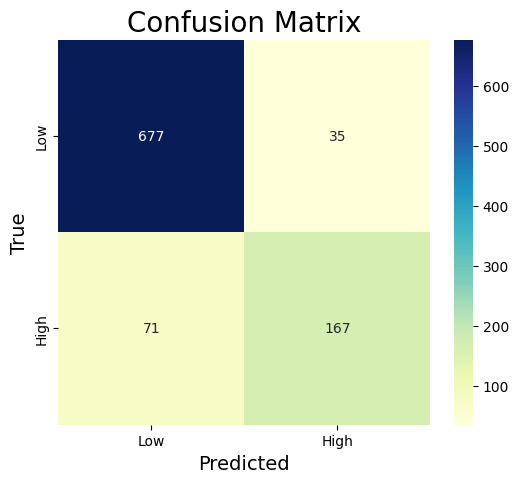

In [41]:
cm = metrics.confusion_matrix(y_test, y_test_pred)
cm_df = pandas.DataFrame(cm,
                     index = ["Low", "High"],
                     columns = ["Low", "High"])
plt.figure(figsize=(6, 5))
seaborn.heatmap(cm_df, annot=True, fmt='d', cmap='YlGnBu')
plt.title("Confusion Matrix", size=20)
plt.ylabel("True", size=14)
plt.xlabel("Predicted", size=14)
plt.show()

Como se veía en el resumen de métricas, hay una alta tasa de aciertos para verdaderos positivos y negativos y baja tasa de fallos para falsos positivos y negativos.

---

As seen in the metrics summary, there is a high rate of correct predictions for true positives and true negatives, and a low rate of errors for false positives and false negatives.

##### ROC curve

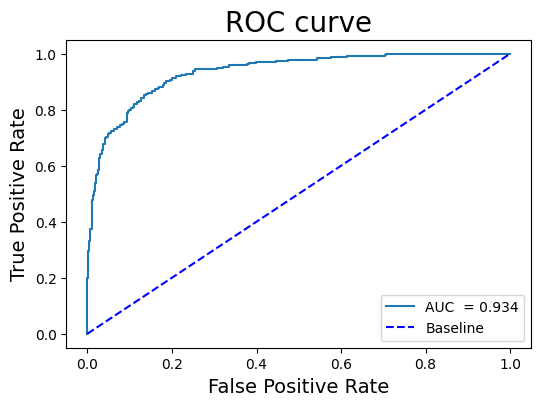

In [42]:
probs = model.predict_proba(x_test)[:, 1]
auc = metrics.roc_auc_score(y_test, probs)
fpr, tpr, thresholds = metrics.roc_curve(y_test, probs)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'AUC  = {auc:.3f}')
plt.plot([0, 1], [0, 1], color="blue", linestyle="--", label="Baseline")
plt.title("ROC curve", size=20)
plt.xlabel("False Positive Rate", size=14)
plt.ylabel("True Positive Rate", size=14)
plt.legend()
plt.show()

La curva ROC y el área bajo la curva (AUC) indican que **se trata de un clasificador magnífico** puesto que el AUC es ~0.93 muy cercano a 1.

---

On the other hand, the ROC curve and the area under the curve (AUC) indicate that **it is an excellent classifier** since the AUC is around 0.93, very close to 1.

#### Results

- **La mejora del XGBoost ajustado frente al no ajustado es mínima**, ~0.01 en accuracy y en F1. Por eso los gráficos corresponden solo al XGBoost ajustado.
- **Los resultados obtenidos por ambos Gradient Boosting son muy buenos**, con ~0.9 en accuracy y ~0.75 en F1.

---

- **The improvement of the adjusted XGBoost over the unadjusted one is minimal**, around 0.01 in accuracy and ~0.75 F1 score. That's why the graphs correspond only to the adjusted XGBoost.
- **The results obtained by both Gradient Boosting models are very good**, with around 0.9 in accuracy and F1 score.

## ChatGPT

ChatGPT es un *chatbot* basado en *large language model* desarrollado por OpenAI. Su lanzamiento en noviembre de 2022 supone un cambio en la dinámica de trabajo habitual y el comienzo de lo que actualmente en 2024 se denomina como el *AI boom* o *AI spring*.

En esta práctica se ha utilizado ChatGPT para agilizar las siguientes tareas:
- Depuración de errores de compilación y ejecución.
- Gestión de ficheros; filtrado de datos; y creación de tablas, *dataframes* y gráficos.
- Escritura de código mediante autorellenado (usando extensiones con IAs como Copilot o Codeium en IDEs como VSCode o VSCodium).

También se ha usado para consultar los modelos entrenados:
- Ventajas y desventajas de cada tipo de modelo. ChatGPT ha contenstado acertadamente en todos los casos, remarcando las características más importantes.
- Hiperparámetros más importantes para ajustar de cada modelo. En este tipo de consultas si no se enfatiza en un conjunto de palabras que implícitamente son más importantes, en este caso sería: "Hiperparámetros **más importantes** ...", se suele obtener una lista no ordenada, en este caso: varios hiperparámetros de un modelo y entre ellos el más importante. Esta situación se puede observar menos en modelos más avanzados como ChatGPT 4.0, los cuales son capaces de entender mejor o interpretar más acertadamente sentencias del lenguaje natural.

---

ChatGPT is a *chatbot* based on a *large language model* developed by OpenAI. Its launch in November 2022 marks a change in the usual work dynamics and the beginning of what is currently referred to in 2024 as the *AI boom* or *AI spring*.

In this practice, ChatGPT has been used to streamline the following tasks:
- Debugging compilation and execution errors.
- File management; data filtering; and creation of tables, *dataframes*, and charts.
- Code writing through autocompletion (using extensions with AIs like Copilot or Codeium in IDEs like VSCode or VSCodium).

It has also been used to consult trained models:
- Advantages and disadvantages of each type of model. ChatGPT has answered accurately in all cases, highlighting the most important features.
- Most important hyperparameters to adjust for each model. In this type of query, if it is not emphasized on a set of words that are implicitly more important, in this case it would be: "Most **important** hyperparameters...", an unordered list is usually obtained, in this case: several hyperparameters of a model and among them the most important one. This situation can be observed less in more advanced models like ChatGPT 4.0, which are capable of better understanding or more accurately interpreting natural language sentences.